# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
display(data.info())
display(data.describe())
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


### Вывод

first_day_exposition - замена на datetime

floors_total - замена на int

is_apartment - замена на bool

balcony - замена на int

parks_around3000 - замена на int

ponds_around3000 - замена на int

days_exposition - замена на int

Также необходимо проанализировать большое кол-во нулевых значений.

### Шаг 2. Предобработка данных

In [5]:
# переведем значения в читаемый формат, избавимся от лишних данных относительно времени.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [6]:
# вполне вероятно графу "апартаменты" пользователь не заполнял (пропустил) в случае владения обычной жилплощадью. 
# в моем окружении большинство людей не знает в чем отличие аппартаментов от обычной квартиры.
# заменим на ложное значение.
data['is_apartment'] = data['is_apartment'].fillna(False)

In [7]:
# аналогичный подход что и к вопросу с апартаментами - думаю пропуски там, где отсутствует балкон.
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [8]:
Q1 = data['total_area'].quantile(0.25)
Q3 = data['total_area'].quantile(0.75)
IQR = Q3 - Q1
del_1 = data[(data['total_area'] < Q1-1.5*IQR ) | (data['total_area'] > Q3+1.5*IQR)]['total_area']
del_1
data = data[~data['total_area'].isin(del_1)]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.4,5,False,...,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.3,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [9]:
Q1 = data['last_price'].quantile(0.25)
Q3 = data['last_price'].quantile(0.75)
IQR = Q3 - Q1
del_2 = data[(data['last_price'] < Q1-1.5*IQR ) | (data['last_price'] > Q3+1.5*IQR)]['last_price']
del_2
data = data[~data['last_price'].isin(del_2)]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,6.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Q1 = data['rooms'].quantile(0.25)
Q3 = data['rooms'].quantile(0.75)
IQR = Q3 - Q1
del_3 = data[(data['rooms'] < Q1-1.5*IQR ) | (data['rooms'] > Q3+1.5*IQR)]['rooms']
del_3
data = data[~data['rooms'].isin(del_3)]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,6.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Q1 = data['ceiling_height'].quantile(0.25)
Q3 = data['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1
del_4 = data[(data['ceiling_height'] < Q1-1.5*IQR ) | (data['ceiling_height'] > Q3+1.5*IQR)]['ceiling_height']
del_4
data = data[~data['ceiling_height'].isin(del_4)].reset_index(drop = True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
1,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
3,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
4,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20469,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,6.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
20470,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
20471,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20472,18,2500000.0,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


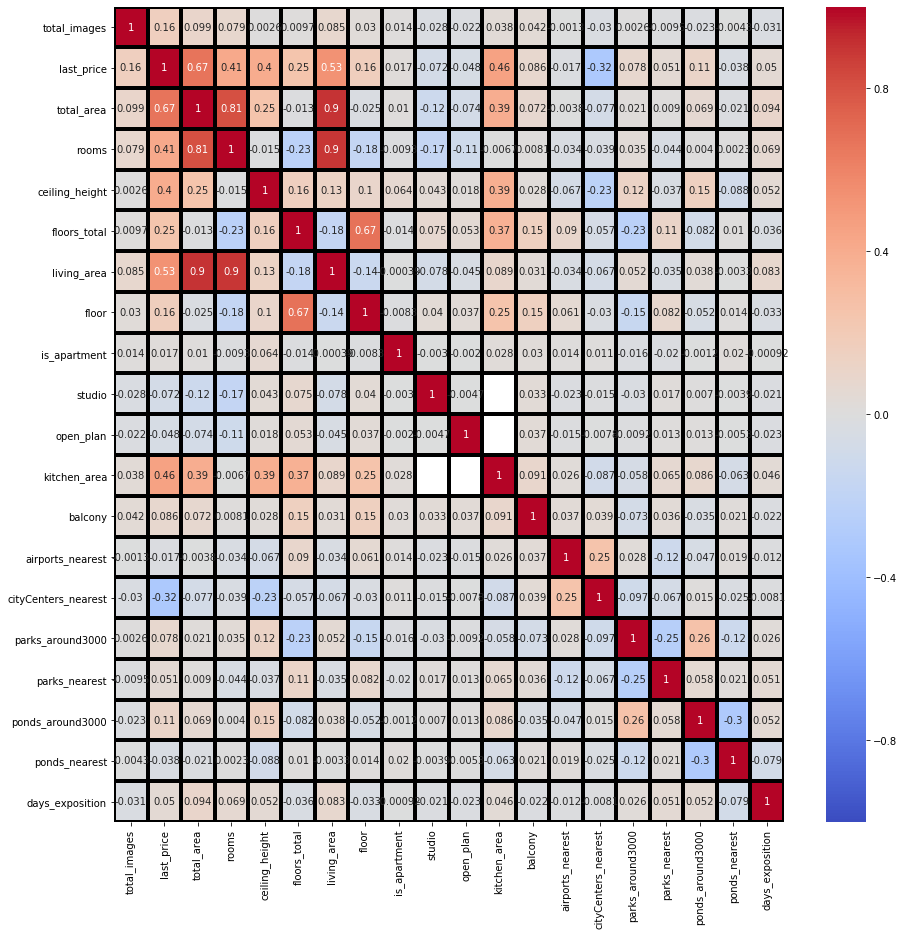

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [13]:
def type_total_area(row):
    if row['total_area'] >= 69.900000:
        return 'крупногабаритное жилье'
    elif  69.900000 > row['total_area'] > 52.000000:
        return 'среднегабаритное жилье'
    elif 52.000000 >= row['total_area'] >= 40.000000:
        return 'малогабаритное жилье'
    elif  40.000000 > row['total_area'] :
        return 'комната'

In [14]:
data['total_area_category'] = data.apply(type_total_area, axis=1)

In [15]:
data[['total_area', 'total_area_category']].head(3)

,total_area,total_area_category
0,40.4,малогабаритное жилье
1,56.0,среднегабаритное жилье
2,100.0,крупногабаритное жилье


In [16]:
list_of_total_area_category = ['крупногабаритное жилье', 'среднегабаритное жилье', 'малогабаритное жилье', 'комната']
for column in list_of_total_area_category:
    value_for_filling = data.groupby('total_area_category')['living_area'].median().get(key=column)
    data['living_area'] = data.groupby('total_area_category')['living_area'].apply(lambda x: x.fillna(x.median()))
data['living_area'] = data.groupby('total_area_category')['living_area'].apply(lambda x: x.fillna(x.median()))

In [17]:
data.head(30)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20474 entries, 0 to 20473
Data columns (total 23 columns):
total_images            20474 non-null int64
last_price              20474 non-null float64
total_area              20474 non-null float64
first_day_exposition    20474 non-null datetime64[ns]
rooms                   20474 non-null int64
ceiling_height          12102 non-null float64
floors_total            20402 non-null float64
living_area             20474 non-null float64
floor                   20474 non-null int64
is_apartment            20474 non-null bool
studio                  20474 non-null bool
open_plan               20474 non-null bool
kitchen_area            18495 non-null float64
balcony                 20474 non-null int64
locality_name           20435 non-null object
airports_nearest        15062 non-null float64
cityCenters_nearest     15073 non-null float64
parks_around3000        15074 non-null float64
parks_nearest           6033 non-null float64
ponds_arou

In [18]:
list_of_total_area_category = ['крупногабаритное жилье', 'среднегабаритное жилье', 'малогабаритное жилье', 'комната']
for column in list_of_total_area_category:
    value_for_filling = data.groupby('total_area_category')['kitchen_area'].median().get(key=column)
    data['kitchen_area'] = data.groupby('total_area_category')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['kitchen_area'] = data.groupby('total_area_category')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

In [19]:
display(data.head(3))
data['kitchen_area'].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
0,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,малогабаритное жилье
1,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,среднегабаритное жилье
2,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,крупногабаритное жилье


0    11.0
1     8.3
2    41.0
Name: kitchen_area, dtype: float64

Увидел зависимость с помощью следующих команд:
data['y_exp'].value_counts()
data[data['y_exp'] == 2019][['days_exposition']].head(5)
Судя по всему произошла ошибка и данные по 2019 году не выгрузились, либо на момент выгрузки они еще стояли на продаже. Стоит направить дозапрос коллегам. Пока думаю оставить так как есть чтобы исключить некорректные выводы при работе с данными. 

In [20]:
data['ceiling_height'].describe()
median_ceiling_height = data['ceiling_height'].median(skipna=True)
data['ceiling_height'] = data.ceiling_height.fillna(median_ceiling_height) 
print(data['ceiling_height'].head(10))
data.info()

0    2.60
1    2.60
2    3.03
3    2.60
4    2.60
5    2.60
6    2.60
7    2.50
8    2.67
9    2.60
Name: ceiling_height, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20474 entries, 0 to 20473
Data columns (total 23 columns):
total_images            20474 non-null int64
last_price              20474 non-null float64
total_area              20474 non-null float64
first_day_exposition    20474 non-null datetime64[ns]
rooms                   20474 non-null int64
ceiling_height          20474 non-null float64
floors_total            20402 non-null float64
living_area             20474 non-null float64
floor                   20474 non-null int64
is_apartment            20474 non-null bool
studio                  20474 non-null bool
open_plan               20474 non-null bool
kitchen_area            20474 non-null float64
balcony                 20474 non-null int64
locality_name           20435 non-null object
airports_nearest        15062 non-null float64
cityCenters_n

Не могу найти причину по которой отсутствовало такое большое кол-во данных по высоте потолка. 
возможно собственники не придают значения этому параметру, стоит уточнить у составителей выборки.
если бы выборка содержала информацию по ЖК, можно было бы заменить пропущенные значения отталкиваясь от известных данных по данному ЖК.
еще есть вариант заменить пропущенные значения по расстоянию от центра - но там тоже большой процент пропусков и для Питера и области эта история не работает.
например на Московском проспекте большое кол-во "сталинок" - думаю средняя высота потолков в Московском районе СПб выше чем в центральном.
по области ситуация аналогичная - в поселке Шушары типичная застройка, а в Петродворце много старого фонда с высокими потолками.
учитывая что среднее не сильно отличается от медианы, а также маленький разброс (не берем ошибочные большие значения) логично заменить пропущенные значения медианой. 

### Вывод

Изменил где необходимо тип данных и разобрался с пропусками в данных, которые вписаны пользователем. По отсутствию информации, которая должна была быть получена автоматически на основе картографических данных необходимо проконсультироваться с составителем выборки.

Воспользовался методом heatmap из библиотеки seaborn и проследил зависимость от ообщей площади. разбил на группы для более точного результата и с помощью медианы заполнил пропуски.

### Шаг 3. Посчитайте и добавьте в таблицу

In [21]:
#цена квадратного метра
data['psmp'] = data['last_price'] / data['total_area']
data['psmp'] = data['psmp'].astype('int')
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,psmp
0,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,малогабаритное жилье,82920
1,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,среднегабаритное жилье,92785
2,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,крупногабаритное жилье,100000


In [22]:
#создаю столбец дня недели
data['w_exp'] = data['first_day_exposition'].dt.weekday
#создаю столбец месяца
data['m_exp'] = data['first_day_exposition'].dt.month
#создаю столбец года
data['y_exp'] = data['first_day_exposition'].dt.year
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,psmp,w_exp,m_exp,y_exp
0,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,малогабаритное жилье,82920,1,12,2018
1,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,среднегабаритное жилье,92785,3,8,2015
2,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,крупногабаритное жилье,100000,1,6,2018


In [23]:
data['y_exp'].value_counts()
data[data['y_exp'] == 2019][['days_exposition']].head(5)

,days_exposition
5,NaN
41,NaN
63,NaN
75,NaN
78,NaN


In [24]:
def level(row):
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
               
data['level'] = data.apply(level, axis = 1)
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,psmp,w_exp,m_exp,y_exp,level
0,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,малогабаритное жилье,82920,1,12,2018,первый
1,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,среднегабаритное жилье,92785,3,8,2015,другой
2,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,крупногабаритное жилье,100000,1,6,2018,другой


In [25]:
# отношение жилой плозади к общей 
data['living_ratio1'] = data['living_area'] / data['total_area']
# отношение площади кухни к общей
data['living_ratio2'] = data['kitchen_area'] / data['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

count    20474.000000
mean        51.598271
std         16.933818
min         12.000000
25%         38.500000
50%         48.000000
75%         62.000000
max        114.500000
Name: total_area, dtype: float64

count    2.047400e+04
mean     4.629184e+06
std      1.992973e+06
min      1.219000e+04
25%      3.270000e+06
50%      4.300000e+06
75%      5.750000e+06
max      1.070000e+07
Name: last_price, dtype: float64

count    20474.000000
mean         1.882339
std          0.876030
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

count    20474.000000
mean         2.626985
std          0.118997
min          2.200000
25%          2.600000
50%          2.600000
75%          2.650000
max          3.120000
Name: ceiling_height, dtype: float64

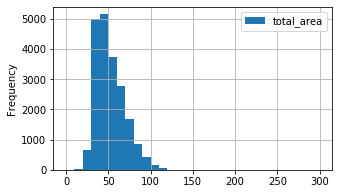

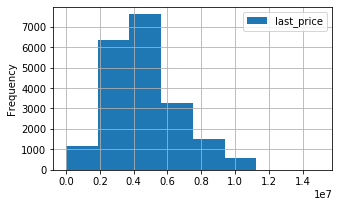

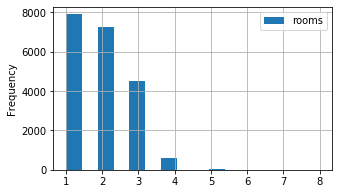

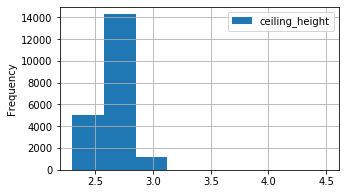

In [26]:
data.plot(x='psmp', y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,300))
display(data['total_area'].describe())
# распределение данных с информацией о площади нормальное(Гаусса), в диапазоне от 38 до 62 кв.м. самое большое кол-во предложений. 
# выборка была изначально от 12 до 900 м2, среднее значение 52, а медиана 48 м2.
# стоит уточнить насчет аномально высоких значений у коллег, предоставивших нам выборку.

data.plot(y = 'last_price', kind = 'hist', bins = 8, grid=True, range = (0,15000000), figsize = (5,3))
display(data['last_price'].describe())
# цены на недвижимость имеют среднее значение в 4,6 млн руб., медиана 4,3 млн руб.  Распределение данных Гаусса.
# cамый популярный сегмент рынка - квартиры стоимостью от 3,2 до 5,7 млн. руб.


data.plot(y = 'rooms', kind = 'hist', bins = 16, range = (1,8), grid=True, figsize = (5,3))
display(data['rooms'].describe())
# больше всего однокомнатных и двухкомнатных квартир, от них не сильно отстают квартиры с тремя комнатами.
# максимальное кол-во - 6 комнат. Для Питера это нормальная история, если предположить что выкуплен целый этаж (бывшая коммуналка)

#изучим высоту потолков
data
data.plot(y = 'ceiling_height', kind = 'hist', bins = 8, range = (2.3,4.5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()
# высота потолков в среднем равна медиане и составляет  2.6 м., крайние значения вызывают вопросы, но на выборку они оказывают незначительное влияние.


count    18057.000000
mean       169.429307
std        207.314742
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

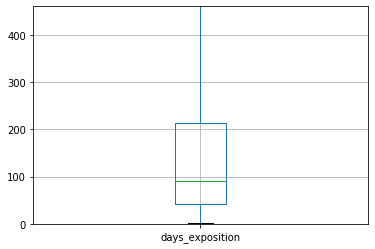

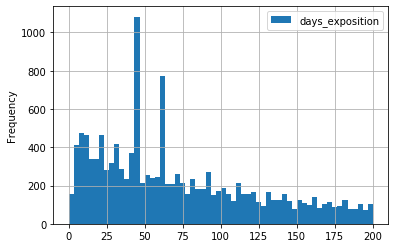

In [27]:
data.boxplot(column = 'days_exposition')
plt.ylim(0, 460)
data.plot(y = 'days_exposition', kind = 'hist', bins = 60, grid = True, range = (0,200))
data['days_exposition'].describe()

### Вывод

Среднее время продажи квартиры - 169 дней, медиана - 90 дней. Судя по диаграмме размаха и числовому описанию данных можно предположить что "очень быстро" - до 43 дней (усы до первого квартиля), а "необычно долго" - от 214 (правый ус). Значения межквартального размаха можем взять за обычное время продажи - от 43 до 214 дней.

count    16453.000000
mean       131.257339
std        127.943648
min          1.000000
25%         38.000000
50%         85.000000
75%        185.000000
max        559.000000
Name: days_exposition, dtype: float64

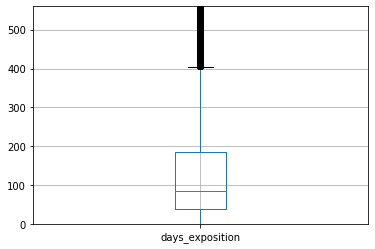

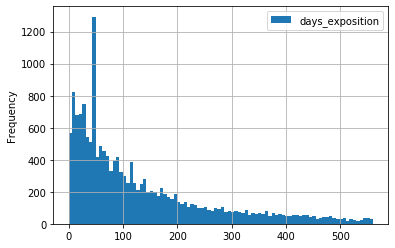

In [28]:
data2 = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0 and days_exposition < 560')
data2.boxplot(column = 'days_exposition')
plt.ylim(0, 560)
data2.plot(y = 'days_exposition', kind = 'hist', bins = 90, grid = True, range = (0,560))
data2['days_exposition'].describe()

### Вывод

Среднее время продажи квартиры уменьшилось до 131 дня, медиана уменьшилась до - 85 дней. Теперь "очень быстро" - до 38 дней (усы до первого квартиля), а "необычно долго" - от 185 (правый ус), обычное время продажи теперь от 38 до 185 дней. Выбивающиеся значения можно объяснить алгоритмами сервиса Яндекс.Недвижимость.

Принято, все поправил в начале проекта.

### Влияние разных факторов на стоимость квартиры.

-0.12689022501886407

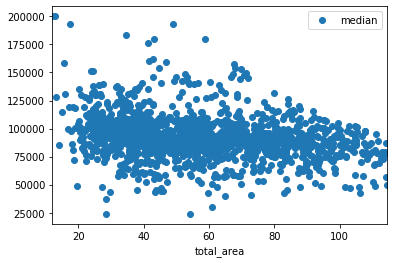

In [29]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
pivot_table_total_area.sort_values('median', ascending = False)
data['total_area'].corr(data['psmp'])

-0.26348730129685843

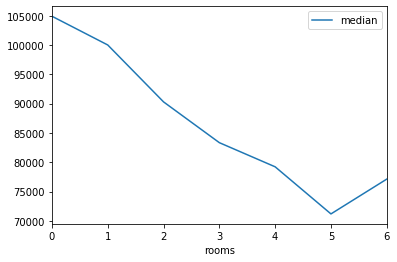

In [30]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median')
data['rooms'].corr(data['psmp'])

Можем увидеть, что в категории распостраненного жилья (1-3 комнаты) цена квадрата обратно пропорциональна кол-ву. 
Большее кол-во комнат вызывает рост цены за квадрат, возможно такое жилье более элитарное, для более конкретных выводов необходимо учесть удаленность от центра и площадь.

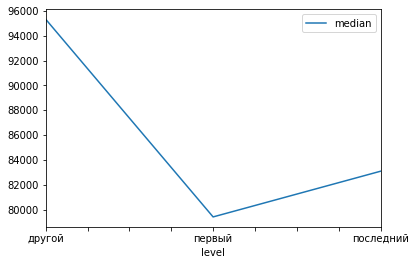

In [31]:
pivot_table_level = data.pivot_table(index = 'level', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
pivot_table_level.columns = ['mean', 'count', 'median']
pivot_table_level.plot(y = 'median')

-0.39175581252236125

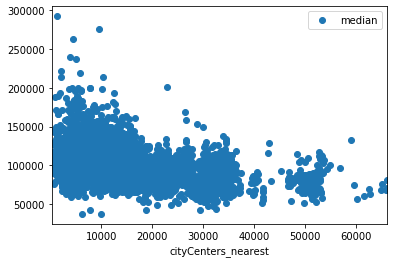

In [32]:
pivot_table_city = data.pivot_table(index = 'cityCenters_nearest', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
pivot_table_city.columns = ['mean', 'count', 'median']
pivot_table_city.plot(y = 'median', style = 'o')

data['cityCenters_nearest'].corr(data['psmp'])

Жилье в центре города дороже.

### Зависимость от даты выставления на продажу.

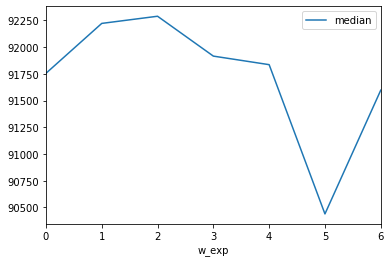

In [33]:
pivot_table_w_exp = data.pivot_table(index = 'w_exp', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
pivot_table_w_exp.columns = ['mean', 'count', 'median']
pivot_table_w_exp.plot(y = 'median')

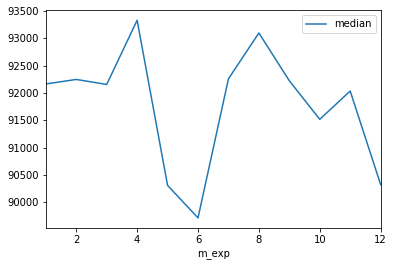

In [34]:
pivot_table_m_exp = data.pivot_table(index = 'm_exp', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
pivot_table_m_exp.columns = ['mean', 'count', 'median']
pivot_table_m_exp.plot(y = 'median')

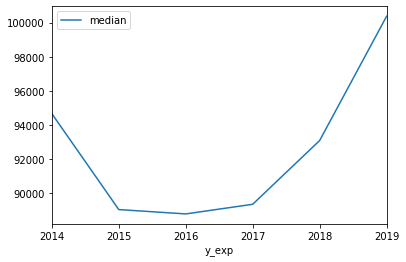

In [35]:
pivot_table_y_exp = data.pivot_table(index = 'y_exp', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
pivot_table_y_exp.columns = ['mean', 'count', 'median']
pivot_table_y_exp.plot(y = 'median')

### Вывод

Возможно по пятницам ставят цену немного ниже с целью стимулировать покупателей к просмотру квартиры на выходных. 
Провал в мае - июне можно объяснить майскими праздниками и началом сезона отпусков. С годами все проще - кризис 14-года и до 2017 отсутствие роста. Возможно дальнейший рост вызван введением эскроу-счетов.

In [36]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'psmp', aggfunc=['count','mean'])
locality_pivot_table.columns = ['count','mean']
locality_pivot_table.sort_values('count', ascending = False).head(10)
#locality_pivot_table.plot(kind='barh',figsize=(12,8))

,count,mean
locality_name,,
Санкт-Петербург,12737,104672.033289
посёлок Мурино,520,85724.784615
посёлок Шушары,435,78639.186207
Всеволожск,389,66983.930591
Колпино,327,75307.003058
посёлок Парголово,326,90331.840491
Пушкин,325,100364.458462
Гатчина,299,68592.645485
деревня Кудрово,298,92409.265101


In [37]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
посёлок Лисий Нос,2,121615.5


In [38]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
деревня Старополье,3,11206.0


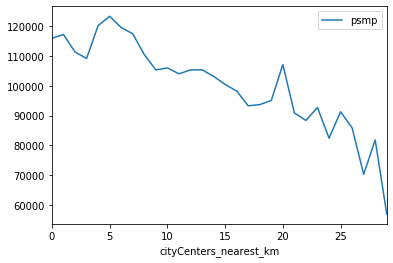

In [39]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'psmp', aggfunc = 'mean')
pivot_table_km.plot()

Три километра - вполне справедливо.

In [40]:
hermitage = data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

-0.5442357365106321

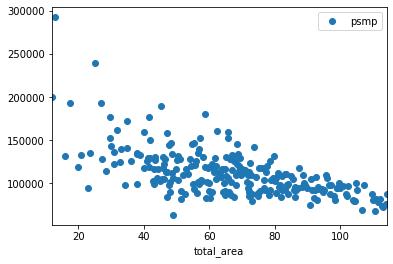

In [41]:
hermitage_total_area = hermitage.pivot_table(index = 'total_area', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
hermitage_total_area.plot(y = 'median', style = 'o')
hermitage['total_area'].corr(hermitage['psmp'])

Отличия от общей выборки незначительные.

-0.4149846221369862

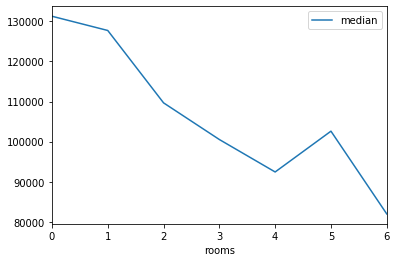

In [42]:
hermitage_rooms = hermitage.pivot_table(index = 'rooms', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
hermitage_rooms.columns = ['mean', 'count', 'median']
hermitage_rooms.plot(y = 'median')

hermitage['rooms'].corr(hermitage['psmp'])

Можно наблюдать ту же тенденцию, что и по квартирам не в центре.

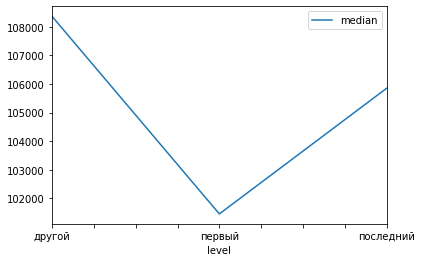

In [43]:
hermitage_level = hermitage.pivot_table(index = 'level', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
hermitage_level.columns = ['mean', 'count', 'median']
hermitage_level.plot(y = 'median')

Отличия от общей выборки незначительные.

-0.09676401948083563

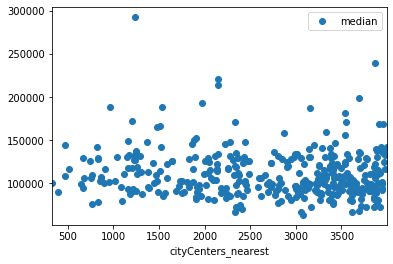

In [44]:
hermitage_city = hermitage.pivot_table(index = 'cityCenters_nearest', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
hermitage_city.columns = ['mean', 'count', 'median']
hermitage_city.plot(y = 'median', style = 'o')

hermitage['cityCenters_nearest'].corr(hermitage['psmp'])

Отличия от общей выборки незначительные.

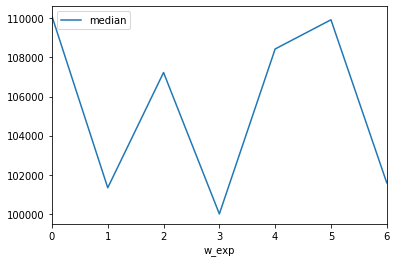

In [45]:
hermitage_w_exp = hermitage.pivot_table(index = 'w_exp', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
hermitage_w_exp.columns = ['mean', 'count', 'median']
hermitage_w_exp.plot(y = 'median')

Пики цен в понедельник и субботу, вторник и четверг маскируются под черную пятницу. Объяснить невозможно, думаю необходимо брать большее кол-во данных.

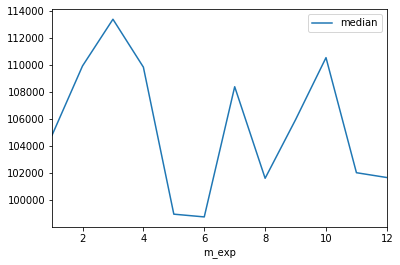

In [46]:
hermitage_m_exp = hermitage.pivot_table(index = 'm_exp', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
hermitage_m_exp.columns = ['mean', 'count', 'median']
hermitage_m_exp.plot(y = 'median')

Отличия от общей выборки незначительные.

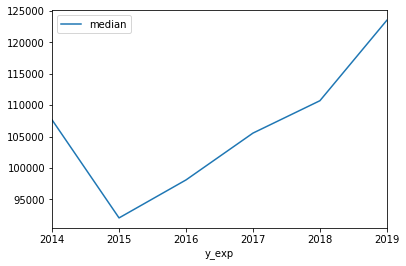

In [47]:
hermitage_y_exp = hermitage.pivot_table(index = 'y_exp', values = 'psmp', aggfunc = ['mean', 'count', 'median'])
hermitage_y_exp.columns = ['mean', 'count', 'median']
hermitage_y_exp.plot(y = 'median')

После удаления выбросов картина принципиально изменилась - после кризиса 14-го года можно наблюдать уверенный рост цен на недвижимость в центре города.

### Шаг 5. Общий вывод

Постарался выявить некоторые факторы которые могут в дальнейшем более корректно оценивать стоимость квартир и противодействовать мошенничеству. Подведем небольшой итог:
1) встречаем большое кол-во пропусков, в моментах где можно их объяснить какой-то логикой заменил, в случаях где информация должна была быть получена автоматически необходимо обратить внимание специалистов предоставляющих выборку.
2) средняя квадратура 52 м2, а медиана 48 м2.Цены на недвижимость имеют среднее значение в 4,6 млн руб., медиана 4,3 млн руб. cамый популярный сегмент рынка - квартиры стоимостью от 3,2 до 5,7 млн. руб. Приоритет у двухкомнатных квартир, доля квартир с кол-вом комнат от одной до трех примерно равная и составляет болшую часть рынка.
3) среднее время продажи квартиры - 169 дней, медиана - 90 дней. "Очень быстро продать квартиру" - до 43 дней , а "необычно долго" - от 214. Обычное время продажи - от 43 до 214 дней. Выбивающиеся значения можно объяснить алгоритмами сервиса Яндекс.Недвижимость.
4) На цену сильнее всего влияет расположение дома относительно центра. С ростом площади цена на квадратный метр уменьшается, это правило распостраняется и на центр города. Не стоит бояться большого кол-ва комнат - в старом фонде преобладает именно такая планировка. Также цены на первых этажах значительно меньше, рынок проседает каждый год в мае-июне
Тенденция последних лет - умеренный рост.


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод